# Solution to Problem 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Importing data into `df`, changing the format of the datetime_utc column to the datetime format, reloving ' _' from the column names and extracting the month column.

In [2]:
df = pd.read_csv('weather.csv')
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.columns = df.columns.str.replace(' _', '')
df['month'] = df['datetime_utc'].dt.month
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm', 'month'],
      dtype='object')

#### Dropping columns that have text and/or have a lot of NaN values

In [3]:
data = df.drop(['conds','precipm','heatindexm','wdire','wgustm','windchillm','wspdm'], axis=1)

#### Filling NaN values with the mean of the columns

In [4]:
data.fillna(data.mean(), inplace=True)

#### Clearing out the outlier data

In [5]:
cleaned = data[(data['pressurem']<1030.0) & (data['pressurem']>990.0)]
cleaned = cleaned[cleaned['vism']<3]
cleaned = cleaned[cleaned['wdird']<400]

In [6]:
cleaned.set_index('datetime_utc',inplace=True)

#### Plot of all the data

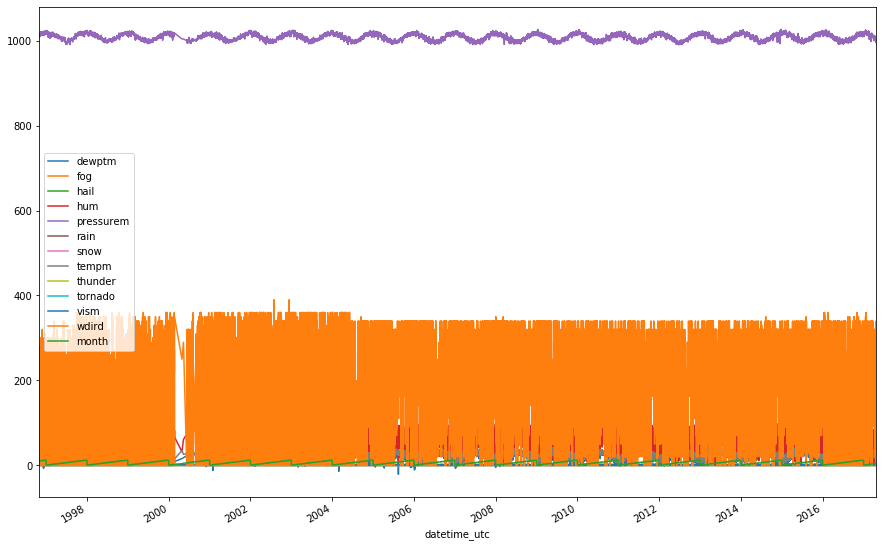

In [7]:
cleaned.plot(figsize=(15,10))

In [8]:
df1 = cleaned.groupby('month').mean()

### Plot of the data of all the parameters in monthly form, with mean taken of all the values

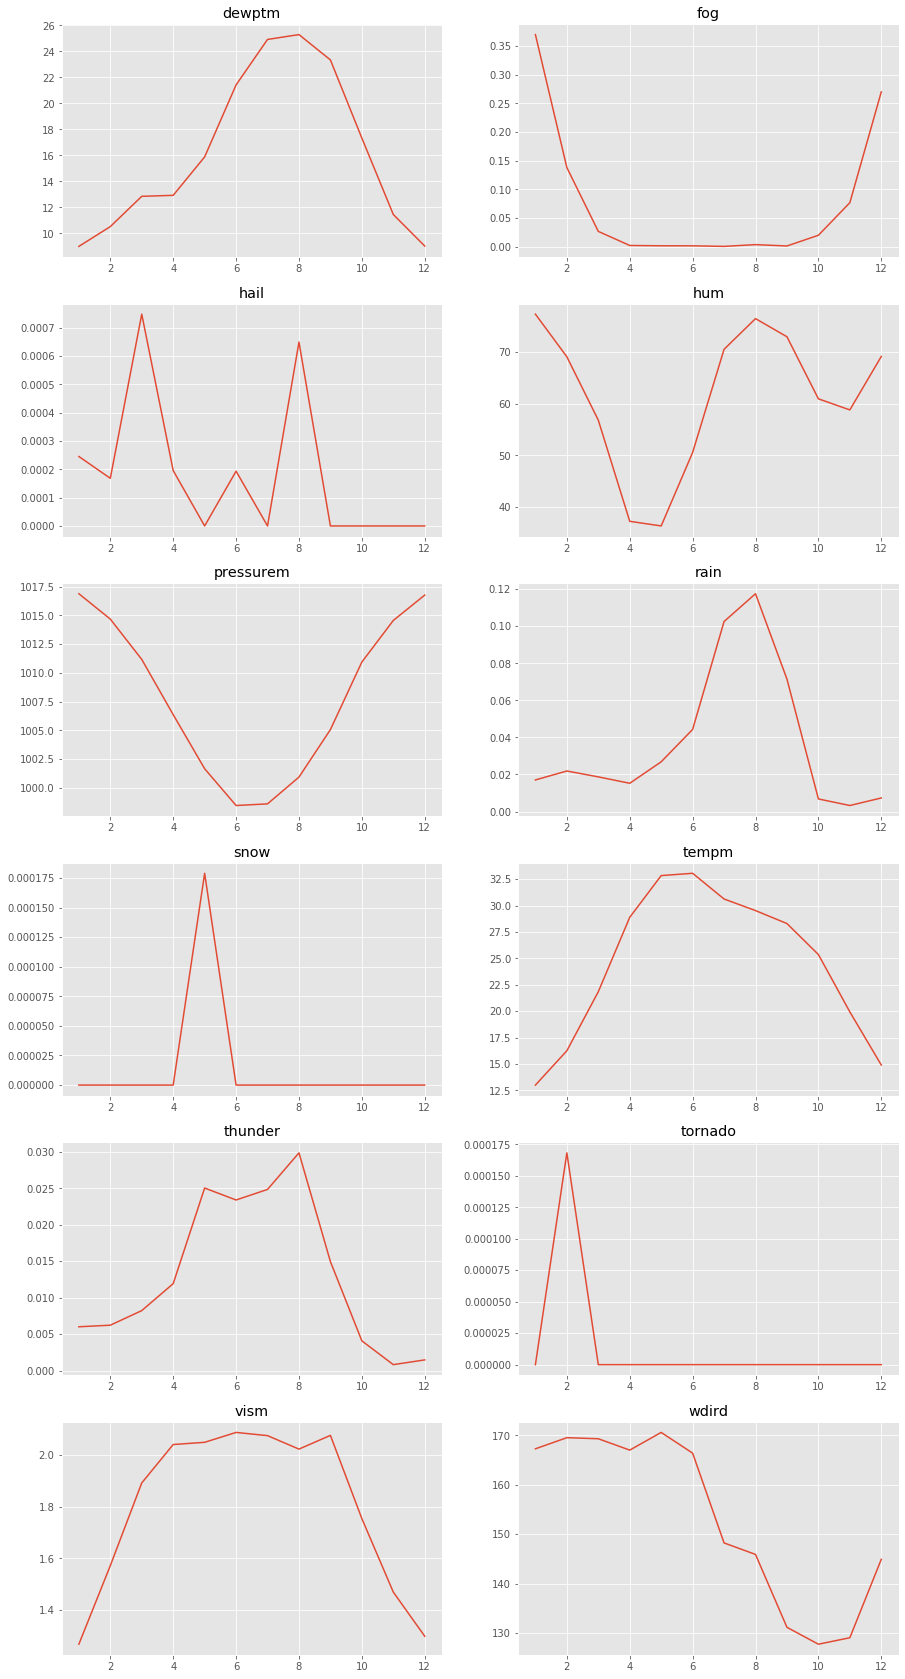

In [9]:
plt.style.use(['ggplot'])
plt.figure(figsize=(15,30))
lst = ['dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado', 'vism', 'wdird']
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(df1[lst[i]])
    plt.title(lst[i])

### Plot of monthly pie charts for conditions of the day in that month

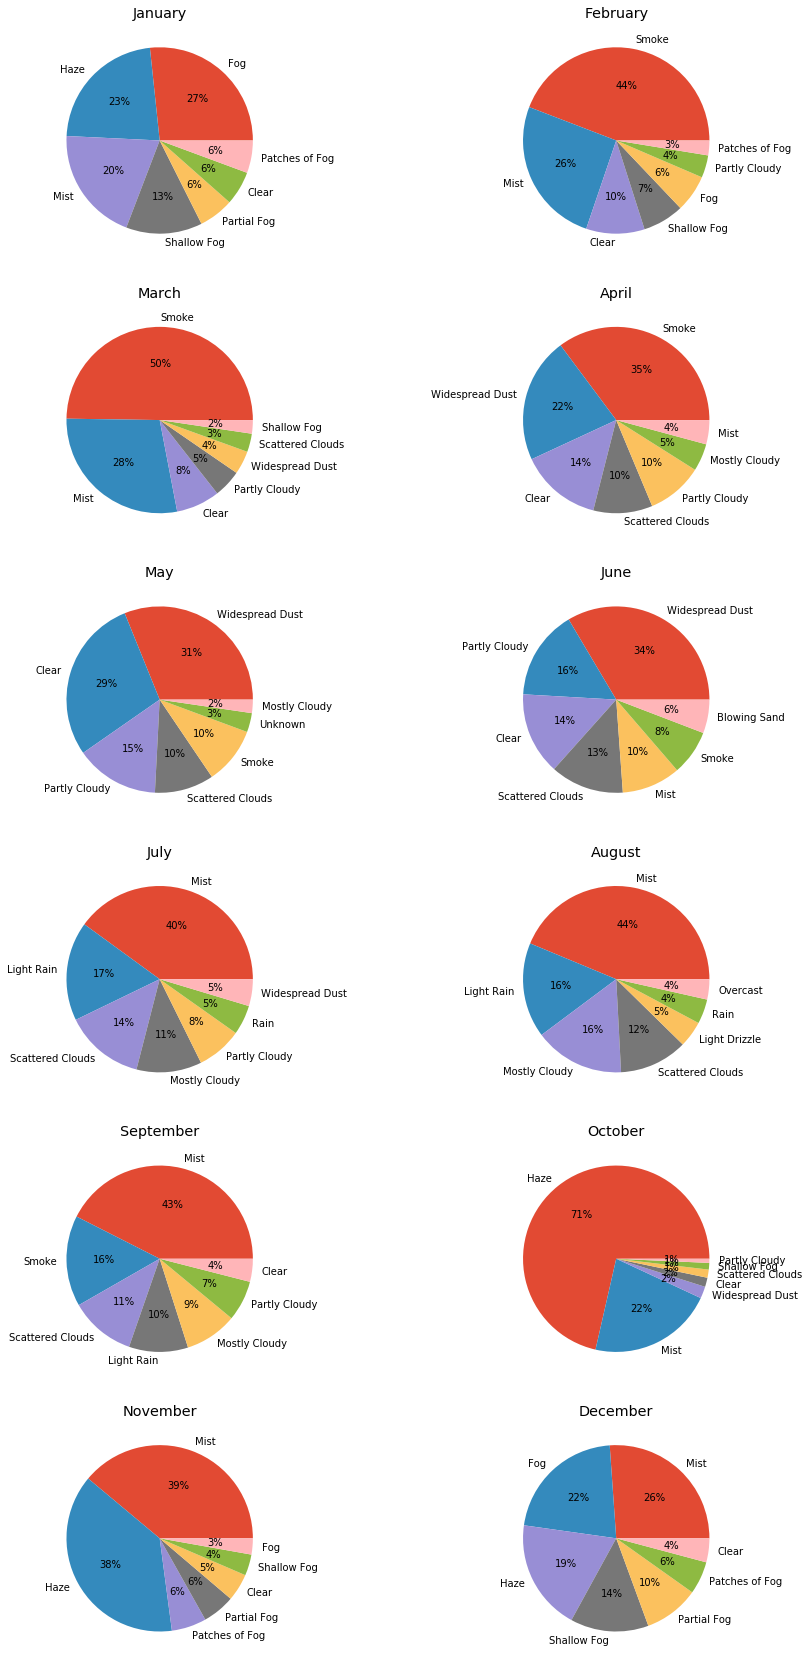

In [10]:
data = df.loc[:,['month','conds']]
data.fillna(method='ffill', inplace=True)

plt.figure(figsize=(15,30))
lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(12):
    tp = pd.DataFrame(data[data['month']==i+1]['conds'].value_counts()).reset_index().loc[1:7]
    plt.subplot(6,2,i+1)
    plt.pie(tp['conds'], labels=tp['index'], autopct='%1.f%%');
    plt.title(lst[i])